In [ ]:
import math as m
from matplotlib import pyplot as plt
from scipy.stats import normaltest
from statistics import NormalDist
from random import random

In [ ]:
# criação dos gráficos
t = ['50', '150', '600', '10000']
def fig():
  plt.figure(figsize=(10,10))
  plt.subplots_adjust(hspace=.9)

### 1 - Aproximação empírica da distribuição binomial pela normal

caso 1: np > K | n(1-p) > K | K > 5
<br> amostra de tamanho 10000 e probabilidade de sucesso 0.5


In [ ]:
def trials(n, p):
  lx = [random() for j in range(n)]
  for i,x in enumerate(lx):
    lx[i] = 1 if x <= p else 0
  return lx

In [ ]:
def z(x, p, n):
  return (x - n * p) / m.sqrt(abs(n*p*(1-p)))

In [ ]:
def test(J, p=0.5, n = 10000):
  zs = []
  for i in range(J):
    x = trials(n, p=p).count(1)
    zs.append(z(x, p=p, n=n))
  return zs

Após a realização dos testes e verificação dos valores obtidos para a variável binomial, é possível observar que a frequência de sucessos se aproxima de uma distribuição normal padrão conforme o número J de tentativas aumenta.

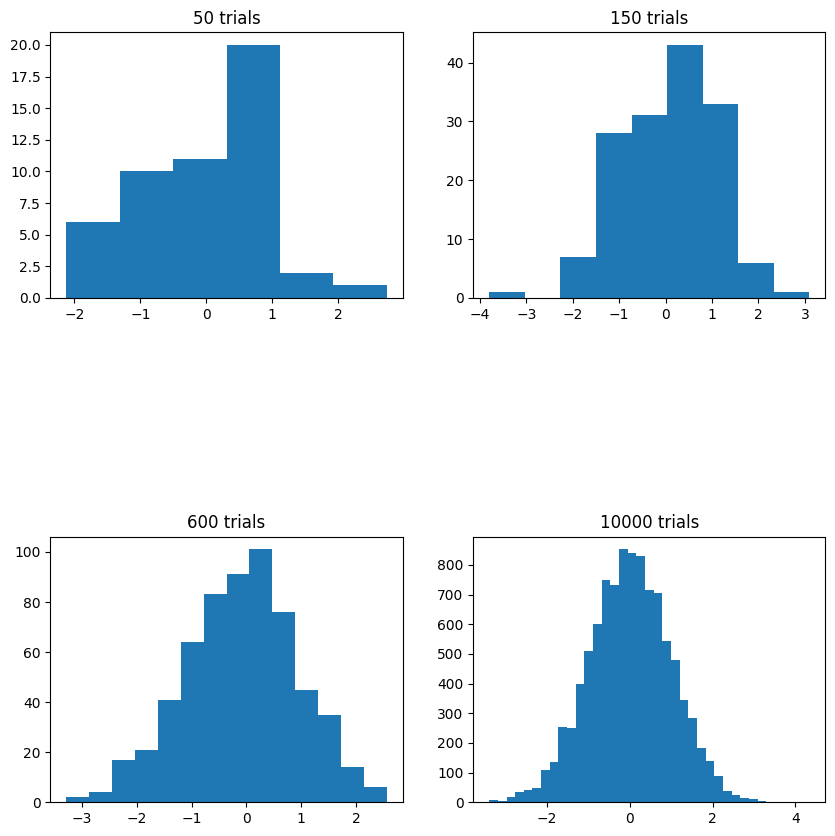

In [ ]:
fig()

for i in range(4):
  plt.subplot(2,2,i+1)
  plt.hist(test(int(t[i])), bins=int(6/(1/((int(t[i]))**(1/3))*3.49)))
  plt.title(f"{t[i]} trials")

Caso 2: Realizando o mesmo procedimento, mas sem satisfazer as relações np > 5 e n(p-1) > 5 com n muito pequeno:

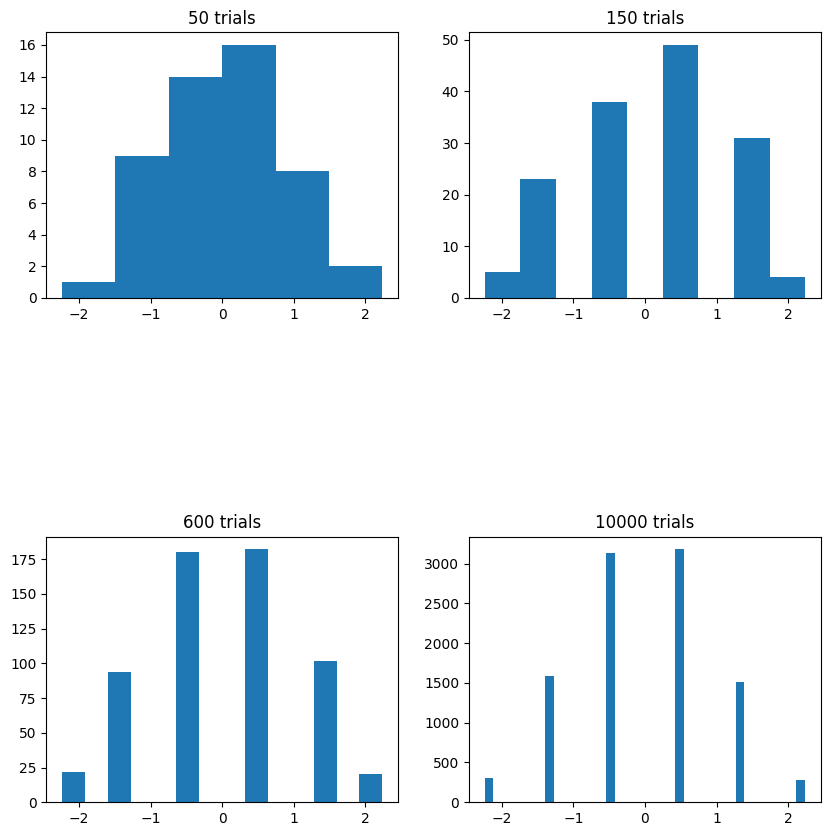

In [ ]:
fig()

for i in range(4):
  plt.subplot(2,2,i+1)
  plt.hist(test(int(t[i]), p=0.5, n=5), bins = int(6/(1/((int(t[i]))**(1/3))*3.49)))
  plt.title(f"{t[i]} trials")

É possível observar que as distribuições obtidas indicam similaridade com a curva gaussiana, mas o comportamento é mais discreto do que contínuo

Caso 3: Utilizando um valor muito pequeno (ou grande) para p:

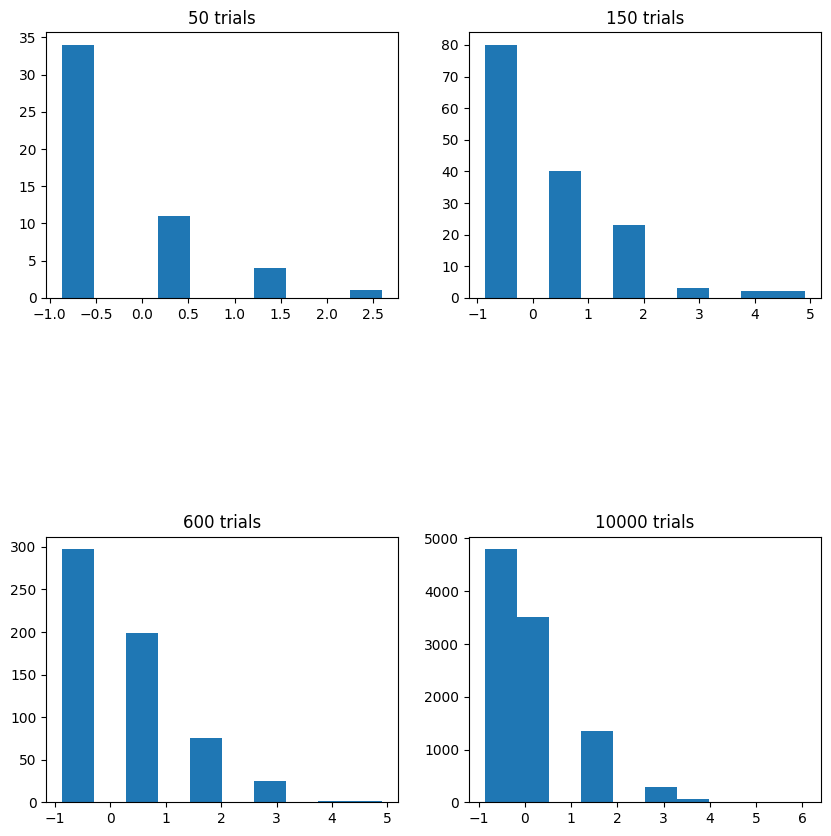

In [ ]:
fig()

for i in range(4):
  plt.subplot(2,2,i+1)
  plt.hist(test(int(t[i]), p=0.0005, n=1500))
  plt.title(f"{t[i]} trials")

Verifica-se uma forma de comportamento fortemente inclinada a um resultado específico. Quanto mais próximo de 0 ou 1 o valor da probabilidade, mais frequente será a ocorrência de um número determinado de sucessos em uma dada sequência de testes.

#### Aproximações utilizando densidade de probabilidades

In [ ]:
def norm(pz):
  # integração numérica da expressão P(X <= x)
  p = -10                              # aproximando -infinito ≃ -10
  itg = 0
  while p < pz:
    itg += m.e**(-(p*p)/2)
    p += 0.00001
  itg *= 0.00001

  return (1/m.sqrt(2*m.pi)) * itg


In [ ]:
# testes
print(norm(-2))
print(norm(0))
print(norm(2))

0.022750401892207395
0.5000019946273728
0.9772501379938859


In [ ]:
def prob(px, p, n):
  return norm((px + 0.5 - n*p)/(m.sqrt(n*p*(1-p))))

In [ ]:
# testes
print(prob(0, 0.5, 100))
print(prob(50, 0.5, 100))
print(prob(60, 0.5, 100))
print(prob(100, 0.5, 100))

1.3195324499582191e-23
0.5398298219558251
0.9821357993445722
0.9999999999985107


Verifica-se que, em 100 testes da binomial e com probabilidade de 50% de sucesso, a probabilidade de ocorrer 0 sucessos é muito baixa, conforme ocorre também na distribuição normal padrão. A probabilidade de ocorrer 50 sucessos ou menos é de 54%, e a probabilidade de ocorrer 100 sucessos ou menos é aproximada a 100%.

Uma vez que a média esperada de sucessos é aproximadamente 50, os valores acima de 50 (como o valor 60 exemplificado) apresentam aumento significativo no resultado da densidade de probabilidade, conforme esperado.

Analisando também os casos 2 e 3:

In [ ]:
print(prob(0, 0.5, 5))
print(prob(50, 0.5, 5))
print(prob(60, 0.5, 5))
print(prob(100, 0.5, 5))

0.036819085265350986
0.9999999999985107
0.9999999999985107
0.9999999999985107


In [ ]:
print(prob(0, 0.95, 100))
print(prob(50, 0.95, 100))
print(prob(60, 0.95, 100))
print(prob(100, 0.95, 100))

0.0
0.0
0.0
0.9941915861209166


### 2 - Teste de hipóteses

Testes bicaudais são utilizados para avaliar o comportamento nas duas extremidades da média.

Para avaliar se uma moeda é honesta ou não, é necessária a realização de diversos testes que podem ser realizados em múltiplas sequências de lançamento. Se a moeda é honesta, espera-se uma distribuição uniforme de resultados, ou seja, o número de caras resultantes deve ser igual ou muito próximo ao número de coroas, uma vez que a probabilidade de obtenção de cada resltado deve ser igual ou próxima de 50%



Utilizando o exemplo anterior e considerando a variável binomial x como o número de caras, n como a quantidade de lançamentos e p como a probabilidade de obtenção de caras, é possível simular o comportamento de uma moeda honesta como segue:

In [ ]:
print("Valor esperado: ≃ n/2")
print(trials(10, 0.5).count(1))           # retorna a quantidade de caras obtida em 10 lançamentos
print(trials(100, 0.5).count(1))
print(trials(500, 0.5).count(1))
print(trials(1000, 0.5).count(1))
print(trials(1500, 0.5).count(1))

Valor esperado: ≃ n/2
5
49
240
512
774


Observa-se que, ao realizar alguns lançamentos em diversos testes diferentes, o valor obtido é sempre próximo da metade do valor total de lançamentos.

Moedas não honestas apresentariam distribuições proporcionais aos valores de probabilidade associados, conforme também é possível observar:

In [ ]:
print("QUantidades de caras em 1000 lançamentos")
print("p = 0.10:", trials(1000, 0.1).count(1), " - aprox. 10%")
print("p = 0.25:", trials(1000, 0.25).count(1), " - aprox. 25%")
print("p = 0.35:", trials(1000, 0.35).count(1), " - aprox. 35%")
print("p = 0.60:", trials(1000, 0.6).count(1), " - aprox. 60%")
print("p = 0.80:", trials(1000, 0.8).count(1), " - aprox. 80%")

QUantidades de caras em 1000 lançamentos
p = 0.10: 97  - aprox. 10%
p = 0.25: 234  - aprox. 25%
p = 0.35: 364  - aprox. 35%
p = 0.60: 587  - aprox. 60%
p = 0.80: 813  - aprox. 80%


Com base nas informações infere-se, portanto, que é possível testar a hipótese de uma moeda ser honesta e atribuir ao resultado um grau de significância, complementar a um valor p (vp).
<br>
<br>
Em geral, o procedimento pode ser realizado definindo uma hipótese nula H0 que se refere ao resultado esperado, nesse caso, H0 representa a hipótese da moeda de fato ser honesta e possuir  p = 0.5. O contraponto à H0 é a hipótese alternativa, H1. Nesse contexto, o teste bicaudal define H1 como qualquer valor para p diferente de 0.5, enquanto testes unilaterais são limitados a avaliar se p é estritamente maior ou menor do que o valor a priori. <br>
Os intervalos de confiança considerados suficientemente significativos e valores críticos são definidos de acordo com cada problema em questão, esses fatores determinam a confiabilidade do teste com base no chamado nível de significância, dado pelo valor p.
<br><br>
Na prática, isso significa que se um teste apresenta vp = 0.05, então a média amostral permite um desvio de até 95% do valor suposto em H0  
Se vp assumir um valor pequeno, então é considerado seguro rejeitar H0 em favor de H1, visto que isso implica que é muito baixa a probabilidade de ocorrência do valor amostral observado, dado o valor suposto. Dessa forma, o valor suposto pode ser rejeitado. Em resumo, valores p muito baixos indicam que é seguro rejeitar a hipótese nula


<strong>Erros</strong><br>
A confiabilidade de um teste é diretamente proporcional ao tamanho da amostra utilizada, visto que amostras maiores podem ser consideradas mais representativas à população e, portanto, apresentam parâmetros com desvios menores.
Nesse sentido, torna-se impossível obter 100% de confiabilidade ao analisar qualquer parâmetro sem utilizar toda a população como amostra, e, como consequência, todos os testes de hipóteses estão sujeitos a erros.

- erro tipo I: Rejeitar H0 sendo ela verdadeira
- erro tipo II: Não rejeitar H0 sendo ela falsa



In [ ]:
def vp(zx):
  return (norm(zx) - 0.5)*2

In [ ]:
n = NormalDist(-2,2)
def hip(pr):                    # pr: valor real de probabilidade
  for i in range(10, 1100, 100):
    x = trials(i, pr)
    zx = z(x.count(1), 0.5, i)
    xvp = vp(n.pdf(zx))

    print(f"n = {i}:")
    print(f"valor p: {xvp}; média: {x.count(1)}")
    r = "REJEITADA" if xvp < 0.05 else "NÃO REJEITADA"
    print("H0:   ", r, "\n\n")

*exemplo:* Assumindo uma moeda honesta com diversas amostras, se p = 0.5, então a média esperada deve ser n/2, dessa forma:
- H0: p = 0.5
- H1: p != 0.5
- 0.05% de significância

In [ ]:
hip(0.5)

n = 10:
valor p: 0.15789761146379067; média: 2
H0:    NÃO REJEITADA 


n = 110:
valor p: 0.0336487796502869; média: 63
H0:    REJEITADA 


n = 210:
valor p: 0.04275809440244038; média: 114
H0:    REJEITADA 


n = 310:
valor p: 0.1404955376725887; média: 146
H0:    NÃO REJEITADA 


n = 410:
valor p: 0.05602521942163863; média: 214
H0:    NÃO REJEITADA 


n = 510:
valor p: 0.034238679836559927; média: 272
H0:    REJEITADA 


n = 610:
valor p: 0.08854621303188281; média: 307
H0:    NÃO REJEITADA 


n = 710:
valor p: 0.05861164904503324; média: 366
H0:    NÃO REJEITADA 


n = 810:
valor p: 0.12839883083438974; média: 395
H0:    NÃO REJEITADA 


n = 910:
valor p: 0.1210299577658851; média: 447
H0:    NÃO REJEITADA 


n = 1010:
valor p: 0.08726942363952062; média: 508
H0:    NÃO REJEITADA 




Observa-se que, testando a moeda como honesta quando ela de fato o é, os valores p obtidos são, na maior parte dos testes, considerados mais altos do que o nível de significância estabelecido. Aqui, os casos em que H0 é rejeitada caracterizam o erros do tipo I, e é possível observar que eles ocorrem com maior frequência em amostras menores.

Realizando o mesmo teste em moedas não honestas:

In [ ]:
hip(0.3)

n = 10:
valor p: 0.12545258176070218; média: 4
H0:    NÃO REJEITADA 


n = 110:
valor p: 0.12266228231439213; média: 37
H0:    NÃO REJEITADA 


n = 210:
valor p: 0.026257628824982948; média: 63
H0:    REJEITADA 


n = 310:
valor p: 0.08123935602357735; média: 117
H0:    NÃO REJEITADA 


n = 410:
valor p: 0.002046571486266968; média: 125
H0:    REJEITADA 


n = 510:
valor p: 4.388348276362919e-05; média: 141
H0:    REJEITADA 


n = 610:
valor p: 3.9892547456510385e-06; média: 169
H0:    REJEITADA 


n = 710:
valor p: 3.9892547456510385e-06; média: 200
H0:    REJEITADA 


n = 810:
valor p: 3.9892547456510385e-06; média: 247
H0:    REJEITADA 


n = 910:
valor p: 3.9892547456510385e-06; média: 273
H0:    REJEITADA 


n = 1010:
valor p: 3.9892547456510385e-06; média: 299
H0:    REJEITADA 




In [ ]:
hip(0.75)

n = 10:
valor p: 0.041969302385617135; média: 7
H0:    REJEITADA 


n = 110:
valor p: 0.0005226141819003605; média: 80
H0:    REJEITADA 


n = 210:
valor p: 3.9892547456510385e-06; média: 158
H0:    REJEITADA 


n = 310:
valor p: 3.9892547456510385e-06; média: 237
H0:    REJEITADA 


n = 410:
valor p: 3.9892547456510385e-06; média: 303
H0:    REJEITADA 


n = 510:
valor p: 3.9892547456510385e-06; média: 373
H0:    REJEITADA 


n = 610:
valor p: 3.9892547456510385e-06; média: 445
H0:    REJEITADA 


n = 710:
valor p: 3.9892547456510385e-06; média: 546
H0:    REJEITADA 


n = 810:
valor p: 3.9892547456510385e-06; média: 614
H0:    REJEITADA 


n = 910:
valor p: 3.9892547456510385e-06; média: 676
H0:    REJEITADA 


n = 1010:
valor p: 3.9892547456510385e-06; média: 776
H0:    REJEITADA 




Quando a probabilidade associada à moeda não é igual a 50% os valores p observados são majoritariamente muito pequenos, e frequentemente não alcançam o valor de significância definido, conforme esperado. Nesses casos, o erro obtido é do tipo II, que ocorre com menor frequência e também é mais característico de amostras menores.

Conclui-se, portanto, que a aproximação de uma variável binomial pela normal é de fato relevante quando o tamanho da amostra é suficientemente significativo e a probabilidade de sucesso é próxima de 50%.